In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dataset = pd.read_csv('TSLA.csv')

In [26]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [27]:
x = dataset[['High', 'Low', 'Open', 'Volume']].values
y = dataset[['Close']].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
regressor= LinearRegression()

In [30]:
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
print(regressor.coef_)

[[ 9.09822286e-01  7.22221223e-01 -6.33406470e-01 -2.55626654e-08]]


In [32]:
print(regressor.intercept_)

[-0.03570889]


In [33]:
predicted = regressor.predict(x_test)
print(predicted)

[[211.93327382]
 [ 28.34344645]
 [ 23.96747049]
 [326.63889044]
 [197.99951124]
 [209.84143145]
 [ 26.57054023]
 [ 24.1159654 ]
 [218.55046473]
 [350.59944847]
 [216.7099975 ]
 [280.40049957]
 [ 31.69697966]
 [102.55542125]
 [ 20.40022644]
 [349.79891149]
 [103.437858  ]
 [258.02993844]
 [ 27.72811815]
 [223.91076239]
 [363.87876094]
 [325.90560673]
 [221.70942778]
 [341.85450842]
 [306.21971732]
 [180.6830296 ]
 [336.4653148 ]
 [271.66139389]
 [226.68781494]
 [244.90669049]
 [ 26.54390033]
 [ 31.41751114]
 [ 30.63028454]
 [227.98926241]
 [392.95272138]
 [222.78373695]
 [214.4718434 ]
 [137.93700922]
 [325.22897451]
 [219.93566688]
 [309.22196141]
 [ 36.64959179]
 [ 23.07174593]
 [214.02967116]
 [ 28.19760332]
 [231.64875996]
 [197.4321599 ]
 [ 34.04842541]
 [308.29253631]
 [272.83813857]
 [231.79550035]
 [298.31285403]
 [ 35.44684051]
 [217.34268703]
 [289.79617795]
 [232.2691816 ]
 [ 34.16691676]
 [237.48107308]
 [ 18.0454679 ]
 [ 52.30063598]
 [227.67194808]
 [ 34.09896992]
 [260.47

In [34]:
df= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})

In [35]:
df.head(25)

,Actual,Predicted
0,207.729996,211.933274
1,28.280001,28.343446
2,24.010000,23.967470
3,315.230011,326.638890
4,200.240005,197.999511
5,210.240005,209.841431
6,26.440001,26.570540
7,22.790001,24.115965
8,224.839996,218.550465
9,353.179993,350.599448


In [36]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error:  1.4055113679181879
Mean Squared Error:  4.25693615777355
Root Mean Squared Error:  2.063234392349437


In [37]:
graph = df.head(20)

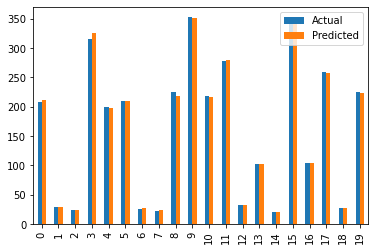

In [38]:
graph.plot(kind='bar')